## **프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!**

**(1) 모듈 import**

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**(2) 데이터 가져오기 및 확인**

In [2]:
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [3]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


**(3) 데이터 준비**

In [4]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(df_X.shape)
# 총 442개의 데이터, 10개의 feature 확인

# target용 df 생성
df_y = pd.DataFrame(diabetes.target, columns=['target'])

#DataFrame 확인
df_X.head()

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
X = df_X.values
y = df_y['target'].values

**(4) train 데이터와 test 데이터 분리하기**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

**(5) 모델 준비하기**

In [7]:
# w와 b 준비하기
W = np.random.rand(10) # X의 feature 10개
b = np.random.rand() # 1개
W, b

(array([0.09385938, 0.21181671, 0.36287586, 0.55988792, 0.49542336,
        0.25797144, 0.167307  , 0.08136506, 0.66481472, 0.52605494]),
 0.7097988100438732)

In [8]:
# 모델 구현
def model(X,W,b):
  predictions = 0
  for i in range(10):
    predictions += X[:,i] * W[i]
  predictions += b
  return predictions

**(6) 손실함수 `loss` 정의하기**

In [9]:
# MSE(Mean Square Error) 평균 제곱 오차 정의
def MSE(a, b):
  mse = ((a - b) ** 2).mean() # 두 값의 차이의 제곱의 평균
  return mse

In [10]:
# 손실함수 loss 정의
def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = MSE(predictions, y)
  return L

**(7) 기울기를 구하는 `gradient` 함수 구현하기**

In [11]:
def gradient(X, W, b, y):
    N = len(X)
    y_pred = model(X,W,b)
    
    dw = 1/N * 2 * X.T.dot(y_pred-y)
    db = 2 * (y_pred-y).mean()
    return dw, db

**(8) 하이퍼 파라미터인 학습률 설정하기**

In [12]:
LEARNING_RATE = 0.01

**(9) 모델 학습하기**

In [13]:
losses = []

for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 5422.0550
Iteration 2000 : Loss 4902.6803
Iteration 3000 : Loss 4522.2639
Iteration 4000 : Loss 4239.3423
Iteration 5000 : Loss 4025.2753
Iteration 6000 : Loss 3860.2358
Iteration 7000 : Loss 3730.4577
Iteration 8000 : Loss 3626.3476
Iteration 9000 : Loss 3541.1878
Iteration 10000 : Loss 3470.2463
Iteration 11000 : Loss 3410.1647
Iteration 12000 : Loss 3358.5372
Iteration 13000 : Loss 3313.6215
Iteration 14000 : Loss 3274.1388
Iteration 15000 : Loss 3239.1363
Iteration 16000 : Loss 3207.8920
Iteration 17000 : Loss 3179.8486
Iteration 18000 : Loss 3154.5676
Iteration 19000 : Loss 3131.6973
Iteration 20000 : Loss 3110.9505


**(10) test 데이터에 대한 성능 확인하기**

In [14]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2844.0754388581236

**(11) 정답 데이터와 예측한 데이터 시각화하기**

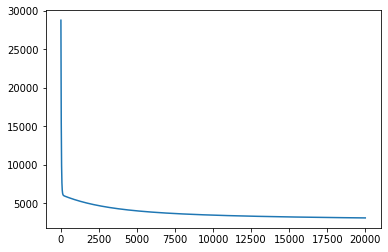

In [15]:
plt.plot(losses)
plt.show()

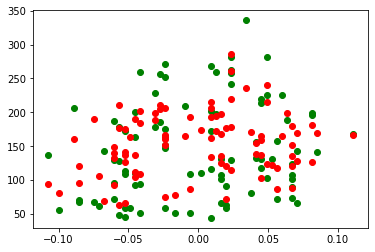

In [16]:
plt.scatter(X_test[:, 0], y_test, label="true", c='g')
plt.scatter(X_test[:, 0], prediction, label="pred", c='r')
plt.show()

**Report**

처음에는 mse가 높게 나와 당황했으나, learning rate 및 반복 횟수를 조정하여 3000이하의 수치를 얻을 수 있었다. 모델의 불완전함을 판단하기 이전에 여러가지 수치를 조정하여 여러차례 시도해보는 것이 좋겠다는 깨달음을 얻었다.

## **프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?**

**(1) 데이터 가져오기**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

plt.style.use('seaborn')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/drive/MyDrive/코드 및 데이터파일/train.csv'
train = pd.read_csv(filename)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
train.shape

(10886, 12)

**(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기**

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
train


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


**(3) year, month, day, hour, minute, second 데이터 개수 시각화하기**

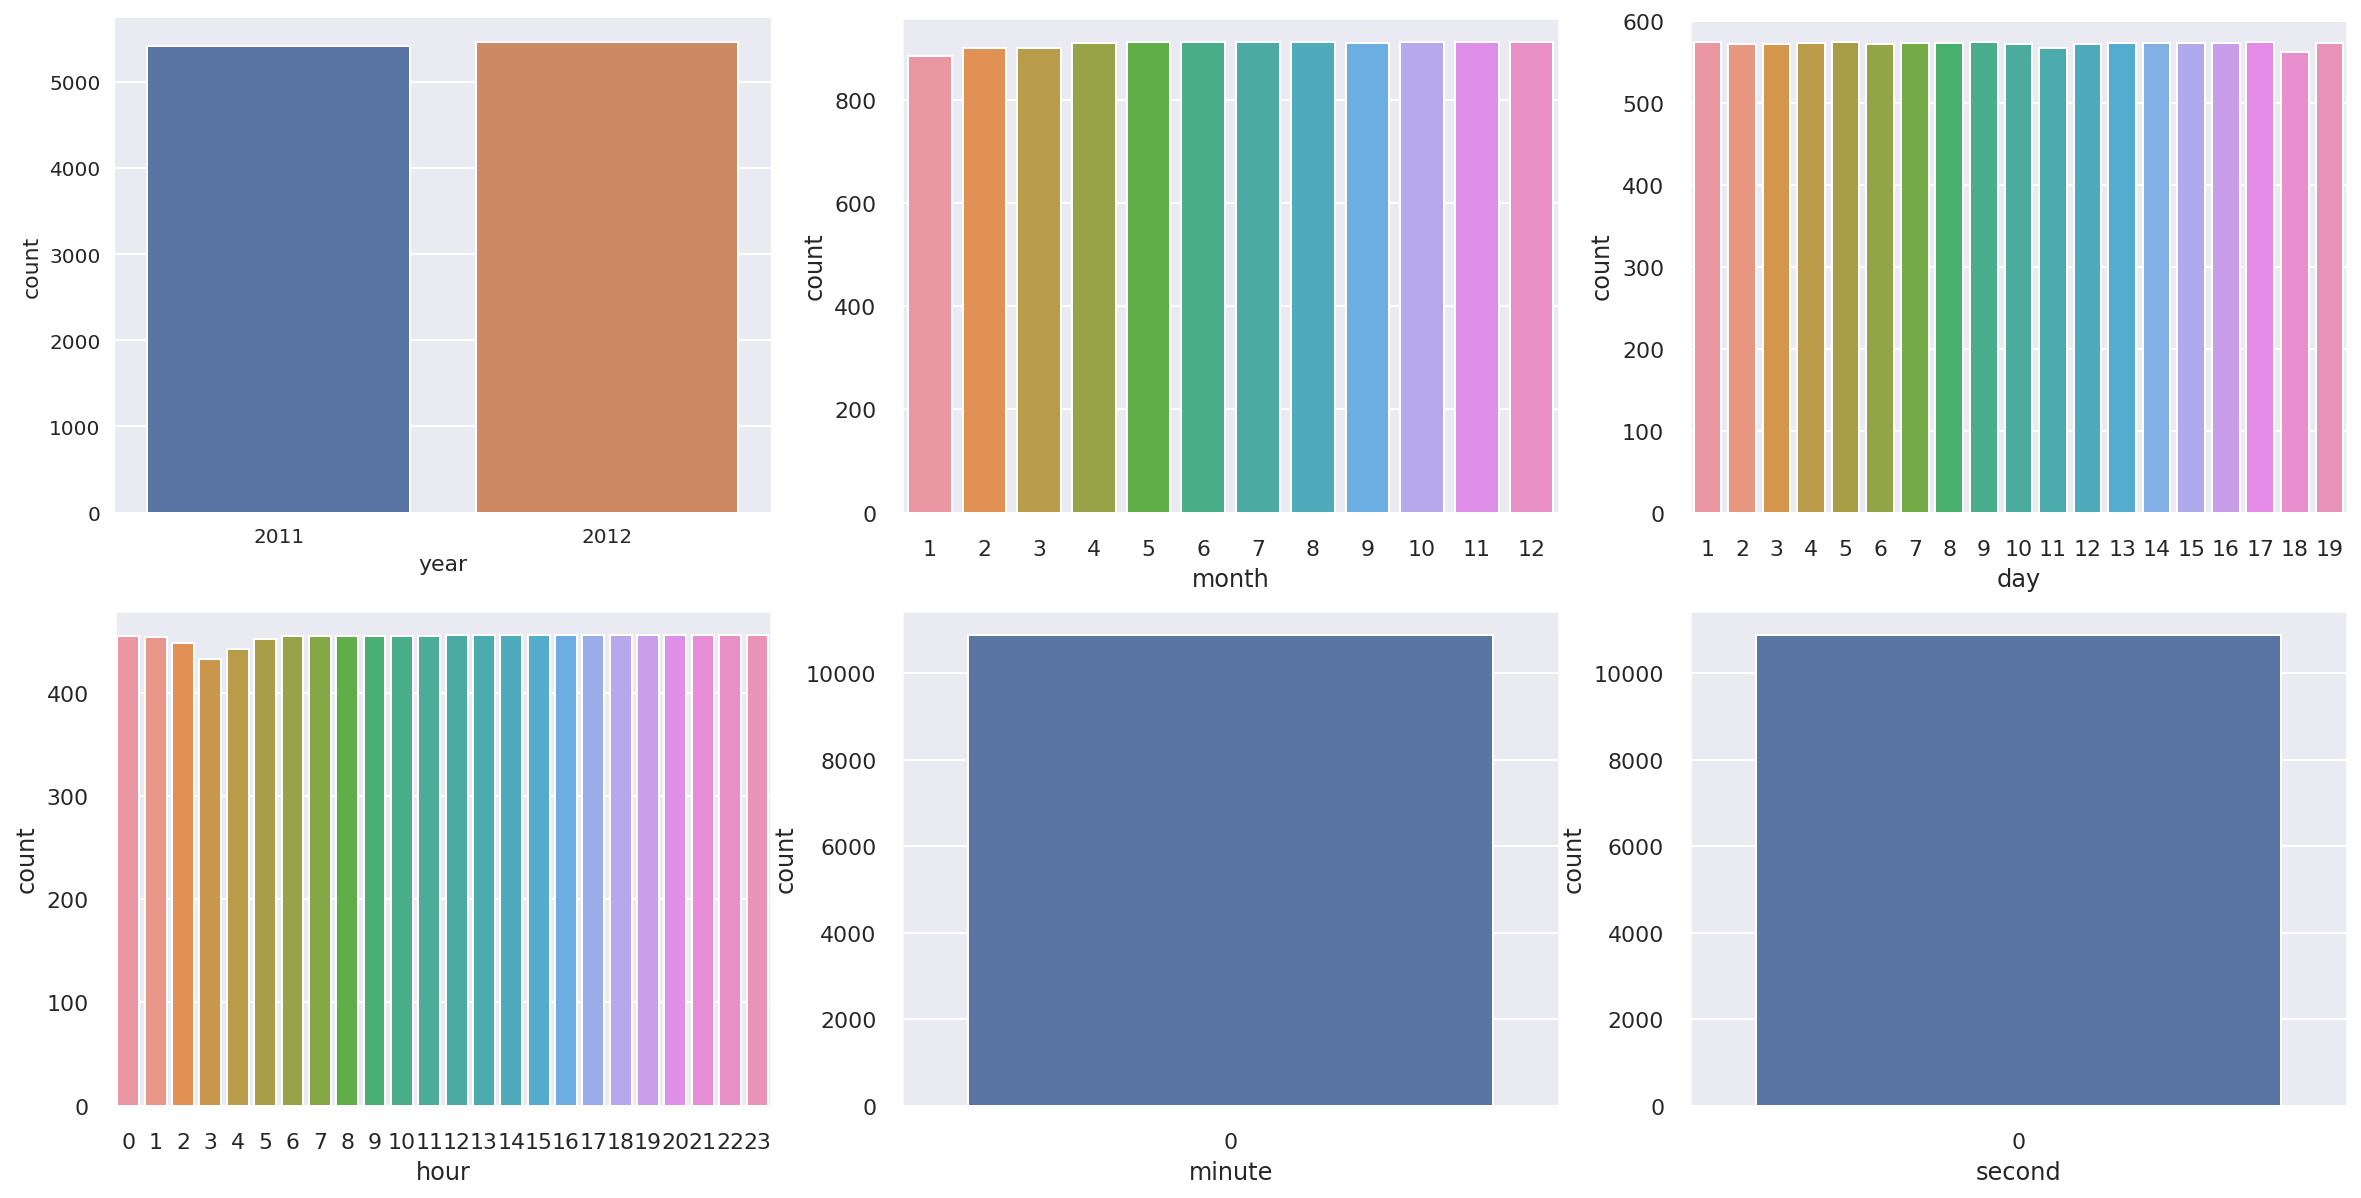

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.set(font_scale=1)
sns.countplot(x='year', data=train)

plt.subplot(2,3,2)
sns.countplot(x='month', data=train)

plt.subplot(2,3,3)
sns.countplot(x='day', data=train)

plt.subplot(2,3,4)
sns.countplot(x='hour', data=train)

plt.subplot(2,3,5)
sns.countplot(x='minute', data=train)

plt.subplot(2,3,6)
sns.countplot(x='second', data=train)

plt.show()

**(4) X, y 컬럼 선택 및 train/test 데이터 분리**

In [ ]:
# 위 결과에서 영향이 없다고 판단되는 minute, second와 datetime 데이터 제외 후 X에 삽입
X = train[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour']].values
y = train[['count']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

**(5) LinearRegression 모델 학습**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산**

In [ ]:
predictions = model.predict(X_test)
predictions

array([[ 87.],
       [248.],
       [334.],
       ...,
       [223.],
       [  4.],
       [286.]])

In [ ]:
rmse = mean_squared_error(y_test, predictions, squared = False)
rmse

5.2014356198300486e-14

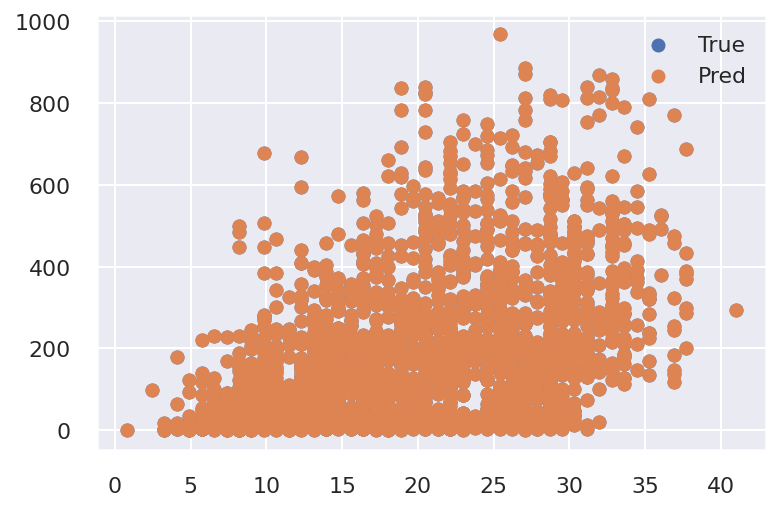

In [ ]:
plt.scatter(X_test[:, 4], y_test, label="True")
plt.scatter(X_test[:, 4], predictions, label="Pred")
plt.legend()
plt.show()

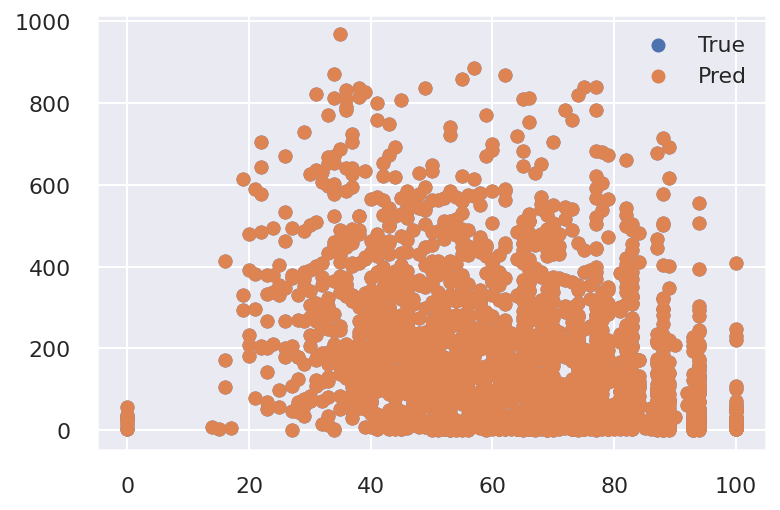

In [ ]:
plt.scatter(X_test[:, 6], y_test, label="True")
plt.scatter(X_test[:, 6], predictions, label="Pred")
plt.legend()
plt.show()

**Report**

결과적으로 매우 낮은 RMSE의 값을 확인할 수 있었으나, 데이터셋이 자체적으로 매우 완전하여 이런 결과가 나왔다고 생각한다. 데이터의 전처리부터, 시각화를 통하여 모델에 적용할 데이터들을 선별하고 학습하는 과정 하나 하나의 유의미함과 중요성에 대해서 깨달을 수 있었다. 더 다양한 데이터들을 다루며 전처리, 시각화, 그리고 가장 중요한 데이터를 선별하고 그 속에서 의미를 찾을 수 있는 데이터 리터러시를 길러야겠다는 생각이 들었다.